In [23]:
## INFS693 MP3

In [2]:
import pandas as pd
# Load the CSV file from a specified path
file_path = '/home/miggy/Downloads/reddit_metadata.csv'

data = pd.read_csv('/home/miggy/Downloads/reddit_metadata.csv')
# Display the first few rows of the dataset to check if it's loaded correctly
data.head()

,ID,hasImage,user_name_len,title_len,num_comments,subreddit,upvote_ratio,score,upvote_ratio.1,2_way_label
0,0,True,11.0,92.0,2.0,mildlyinteresting,0.84,12,0.84,1
1,1,True,9.0,NaN,NaN,psbattle_artwork,NaN,5,NaN,0
2,2,True,8.0,35.0,2.0,pareidolia,0.99,119,0.99,0
3,3,True,14.0,45.0,1.0,neutralnews,0.92,44,0.92,1
4,4,True,NaN,NaN,NaN,psbattle_artwork,NaN,3,NaN,0


In [3]:
#1 Inspect data types (and transform if needed) (2 marks)
data.head(), data.dtypes


(   ID  hasImage  user_name_len  title_len  num_comments          subreddit  \
 0   0      True           11.0       92.0           2.0  mildlyinteresting   
 1   1      True            9.0        NaN           NaN   psbattle_artwork   
 2   2      True            8.0       35.0           2.0         pareidolia   
 3   3      True           14.0       45.0           1.0        neutralnews   
 4   4      True            NaN        NaN           NaN   psbattle_artwork   
 
    upvote_ratio  score  upvote_ratio.1  2_way_label  
 0          0.84     12            0.84            1  
 1           NaN      5             NaN            0  
 2          0.99    119            0.99            0  
 3          0.92     44            0.92            1  
 4           NaN      3             NaN            0  ,
 ID                  int64
 hasImage             bool
 user_name_len     float64
 title_len         float64
 num_comments      float64
 subreddit          object
 upvote_ratio      float64
 sco

In [ ]:
#2  Inspect missing values (and replace if needed) (2 marks)

# Calculate the number of missing values and their proportion in each column
missing_data = data.isnull().sum()
missing_proportion = data.isnull().mean() * 100

# Display the missing values and their proportion
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Proportion (%)': missing_proportion})
missing_info[missing_info['Missing Values'] > 0]

# Replace missing values with the mean of each column (for numerical columns)
data.fillna(data.mean(), inplace=True)


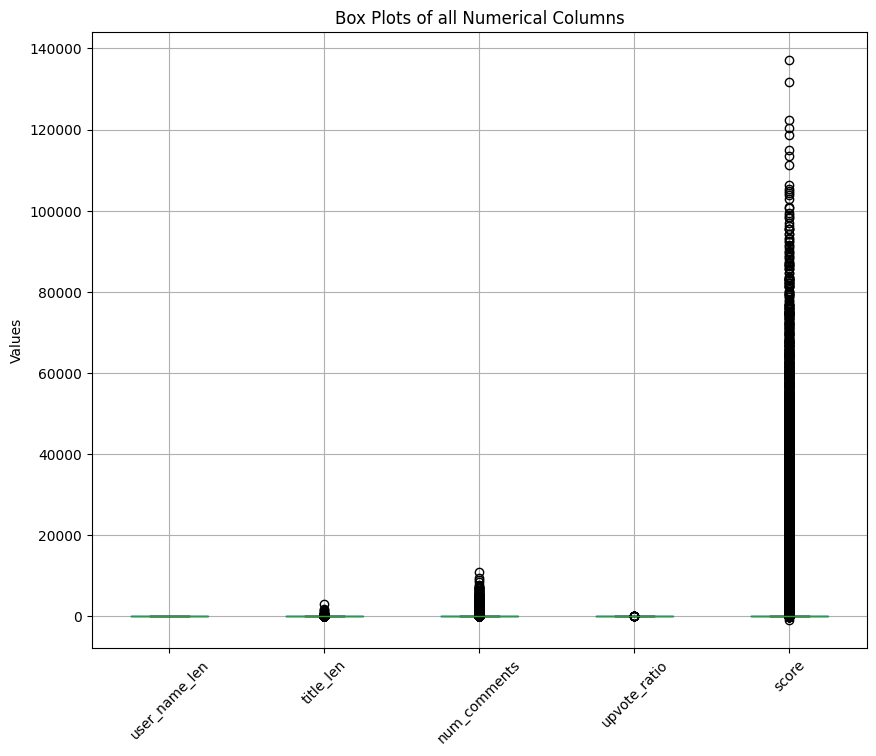

In [6]:
#3 Inspect outliers (and replace if needed) (2 marks)

import matplotlib.pyplot as plt

# Creating box plots for numerical columns to identify outliers
fig, axes = plt.subplots(figsize=(10, 8))  

# List of numerical columns to inspect for outliers
columns_to_plot = ['user_name_len', 'title_len', 'num_comments', 'upvote_ratio', 'score']

# Generating a combined box plot for all numerical columns
data[columns_to_plot].boxplot(ax=axes)
axes.set_title('Box Plots of all Numerical Columns')
axes.set_ylabel('Values')
axes.set_xticklabels(columns_to_plot, rotation=45)  

plt.show()


In [5]:
# Calculate the IQR for 'num_comments'
Q1 = data['num_comments'].quantile(0.25)
Q3 = data['num_comments'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as any value outside 1.5 * IQR from the Q1 and Q3
outliers_mask = ((data['num_comments'] < (Q1 - 1.5 * IQR)) | 
                 (data['num_comments'] > (Q3 + 1.5 * IQR)))

# Count the outliers
print("Number of outliers:", outliers_mask.sum())


Number of outliers: 81071


In [6]:
# Calculate median of the non-outliers
median_value = data.loc[~outliers_mask, 'num_comments'].median()

# Replace outliers with the median
data.loc[outliers_mask, 'num_comments'] = median_value

# Confirm replacement by checking if there are any outliers left
new_outliers_count = ((data['num_comments'] < (Q1 - 1.5 * IQR)) | 
                      (data['num_comments'] > (Q3 + 1.5 * IQR))).sum()
print("Outliers after replacement:", new_outliers_count)


Outliers after replacement: 0


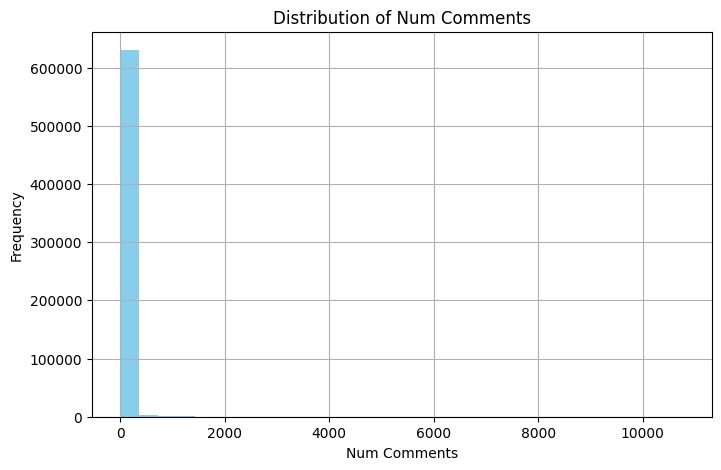

In [3]:
#4 contains at least four different plots for visualization and one of them related to correlation (2 marks)

import matplotlib.pyplot as plt

# Histogram of num_comments

plt.figure(figsize=(8, 5))
plt.hist(data['num_comments'], bins=30, color='skyblue')
plt.title('Distribution of Num Comments')
plt.xlabel('Num Comments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


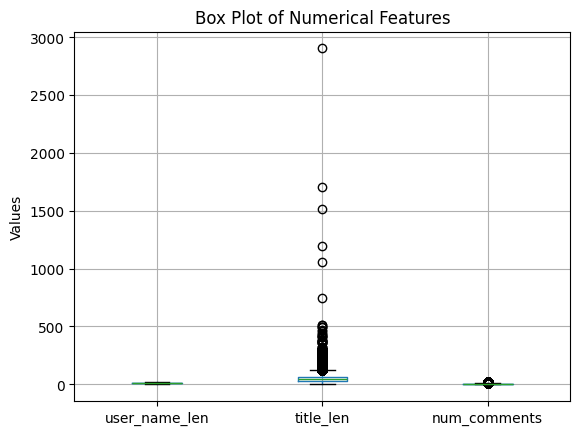

In [10]:
# Box plot of numerical features

data[['user_name_len', 'title_len', 'num_comments']].boxplot()
plt.title('Box Plot of Numerical Features')
plt.ylabel('Values')
plt.grid(True)
plt.show()


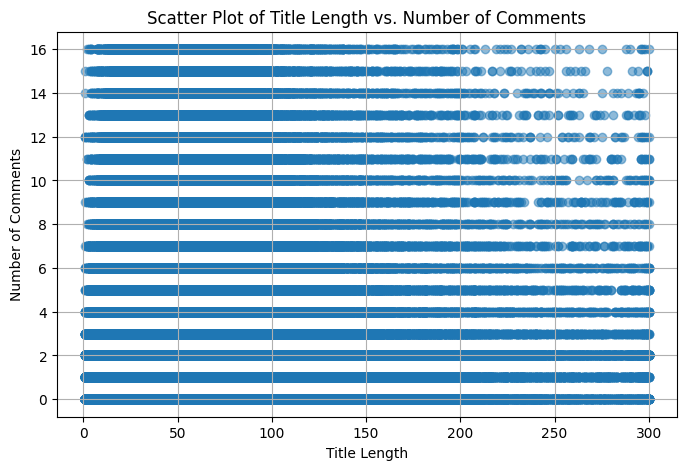

In [12]:
# Scatter plot of title_len vs num_comments

plt.figure(figsize=(8, 5))
plt.scatter(data['title_len'], data['num_comments'], alpha=0.5)
plt.title('Scatter Plot of Title Length vs. Number of Comments')
plt.xlabel('Title Length')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()


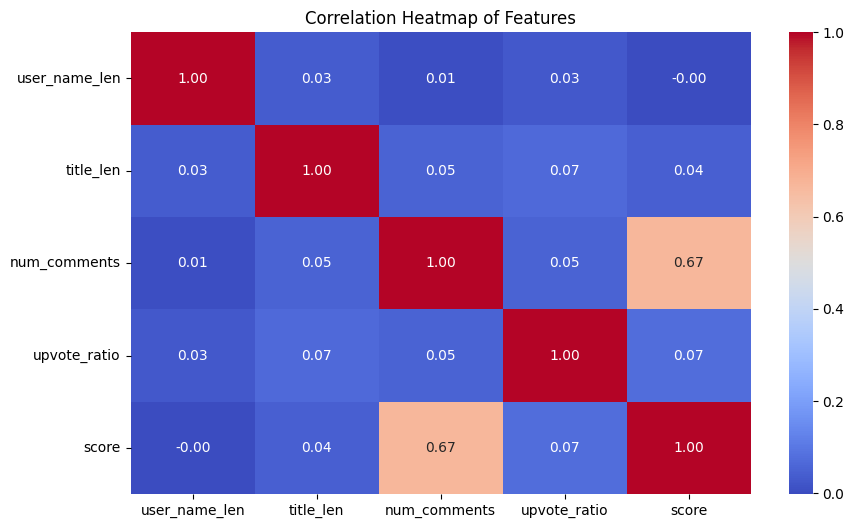

In [4]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[['user_name_len', 'title_len', 'num_comments', 'upvote_ratio', 'score']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


In [19]:
#5 use holdout method to train a logistic regression model (2 marks)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features and target
X = data[['title_len', 'user_name_len', 'upvote_ratio']]
y = data['2_way_label']

combined = X.join(y)  # Combine X and y into a single DataFrame to ensure alignment
cleaned_combined = combined.dropna()  # Dropping all rows with any NaN values

# Separate the cleaned data back into X and y
X_clean = cleaned_combined[['title_len', 'user_name_len', 'upvote_ratio']]
y_clean = cleaned_combined['2_way_label']


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)


In [21]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)  # Set max_iter to a higher value if convergence issues occur
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
# 6/ evaluate the model on both training set and testing set (2 marks)

y_pred = model.predict(X_test)  # Predictions for the test set


In [24]:
y_train_pred = model.predict(X_train)  # Predictions for the training set


In [25]:
from sklearn.metrics import accuracy_score

# Testing set evaluation
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Set Accuracy:", test_accuracy)


# Training set evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Set Accuracy:", train_accuracy)



Testing Set Accuracy: 0.6404579948696024
Training Set Accuracy: 0.6406500061553613


In [26]:
#7 try to train and evaluate the model with only one feature (2 marks)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the single feature and target
X = data[['title_len']]  # Selected only one feature here 
y = data['2_way_label']


In [29]:
# Drop rows where any of the features or target have missing values
cleaned_data = data.dropna(subset=['title_len', 'user_name_len', 'upvote_ratio', '2_way_label'])

# Redefine X and y with the cleaned data
X = cleaned_data[['title_len']] 
y = cleaned_data['2_way_label']




In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [32]:
# Predictions for training and testing sets
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)




Training Set Accuracy: 0.6118343263028609
Testing Set Accuracy: 0.6125213766566909


In [42]:
# 8/ try to train and evaluate the model with at least six features (2 marks)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



In [44]:
# Define features and target
features = ['title_len', 'user_name_len', 'upvote_ratio', 'score', 'num_comments', 'subreddit']
X = data[features].copy()  # Use .copy() to avoid modifying a slice directly
y = data['2_way_label']

# Encode 'subreddit' as a numeric feature using LabelEncoder
label_encoder = LabelEncoder()
X.loc[:, 'subreddit'] = label_encoder.fit_transform(X['subreddit'])

# Handle missing values using SimpleImputer with the median strategy
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Convert imputed array back to DataFrame with correct column names
X = pd.DataFrame(X_imputed, columns=features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.69448981052522
Testing Set Accuracy: 0.6963099602984826


In [22]:
#9 compare the results of one feature v.s. six features 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # Corrected import for SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

features = ['title_len', 'user_name_len', 'upvote_ratio', 'score', 'num_comments', 'subreddit']
X = data[features].copy()
y = data['2_way_label']

# Impute missing values for numerical features first
imputer = SimpleImputer(strategy='median')
X_numerical = X.select_dtypes(include=['int64', 'float64'])
X.loc[:, X_numerical.columns] = imputer.fit_transform(X_numerical)

# Convert 'subreddit' to categorical codes
X['subreddit'] = X['subreddit'].astype('category').cat.codes

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train with one feature (title_len)
model_one_feature = LogisticRegression(max_iter=1000)
model_one_feature.fit(X_train[['title_len']], y_train)
y_train_pred_one = model_one_feature.predict(X_train[['title_len']])
y_test_pred_one = model_one_feature.predict(X_test[['title_len']])
one_feature_train_accuracy = accuracy_score(y_train, y_train_pred_one)
one_feature_test_accuracy = accuracy_score(y_test, y_test_pred_one)

# Train with six features
model_six_features = LogisticRegression(max_iter=1000)
model_six_features.fit(X_train, y_train)
y_train_pred_six = model_six_features.predict(X_train)
y_test_pred_six = model_six_features.predict(X_test)
six_features_train_accuracy = accuracy_score(y_train, y_train_pred_six)
six_features_test_accuracy = accuracy_score(y_test, y_test_pred_six)

# Print accuracies
print("=== One Feature Model ===")
print("Training Set Accuracy (One Feature):", one_feature_train_accuracy)
print("Testing Set Accuracy (One Feature):", one_feature_test_accuracy)

print("\n=== Six Features Model ===")
print("Training Set Accuracy (Six Features):", six_features_train_accuracy)
print("Testing Set Accuracy (Six Features):", six_features_test_accuracy)



=== One Feature Model ===
Training Set Accuracy (One Feature): 0.6422573655718078
Testing Set Accuracy (One Feature): 0.6422991961012047

=== Six Features Model ===
Training Set Accuracy (Six Features): 0.69448981052522
Testing Set Accuracy (Six Features): 0.6963099602984826
